In [1]:
import urllib
from IPython.display import Image, display, clear_output
from collections import Counter
import keras.utils
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')

ModuleNotFoundError: No module named 'keras'

In [2]:
import os
import h5py
import numpy as np
import pandas as pd
from keras.regularizers import l2, l1
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model,Model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
from keras.preprocessing import image

In [22]:
vgg16 =VGG16(weights='imagenet', include_top=False,input_shape = (img_width,img_height, 3))

for layer in vgg16.layers:
        layer.trainable = False
x=vgg16.output
x=Flatten()(x) # 512, 4, 4
x=Dense(256, activation = 'relu', W_regularizer=l2(0.01))(x)
x=Dropout(0.5)(x)
predictions=Dense(1, activation = 'sigmoid')(x)
model_final = Model(input = vgg16.input, output = predictions)
model_final.compile(optimizers.SGD(lr=0.0001, momentum=0.9),
                  loss='binary_crossentropy', metrics=['accuracy'])


/usr/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_regularizer=<keras.reg...)`
  import sys
/usr/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


In [30]:
def train_binary_model():

    train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                      height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                       horizontal_flip=True,fill_mode='nearest')
    test_datagen=ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=16, 
                                                class_mode='binary') 
    test_generator = test_datagen.flow_from_directory(validation_data_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=16,
                                               class_mode='binary')

    checkpoint = ModelCheckpoint(top_model, monitor='val_acc', 
                                     verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

    fit = model_final.fit_generator(train_generator,
                  steps_per_epoch=nb_train_samples//batch_size,                  
                  nb_epoch=nb_epoch,
                  validation_data=test_generator,
                  validation_steps=nb_validation_samples//batch_size,
                  verbose=1,
                 callbacks=[checkpoint])

    with open(location+'/top_history.txt', 'w') as f:
        json.dump(fit.history, f)

    return model_final, fit.history

In [31]:
def plot_metrics(hist, stop=50):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
                            
    axes = axes.flatten()

    axes[0].plot(range(stop), hist['acc'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist['val_acc'], label='Validation', color='#03507E')
    axes[0].set_title('Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
                             
    axes[1].plot(range(stop), hist['loss'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist['val_loss'], label='Validation', color='#03507E')
    axes[1].set_title('Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper right')
                             
    plt.tight_layout();

In [19]:
def evaluate_binary_model(model, directory, labels):
    datagen = ImageDataGenerator(rescale=1./255)  

    generator = datagen.flow_from_directory(validation_data_dir,
                                target_size=(img_height, img_width),
                                batch_size=batch_size,
                                class_mode='binary', 
                                shuffle=False)
    
    predictions = model_final.predict_generator(generator, steps=np.ceil(nb_validation_samples/16))   
    
    pred_labels = [0 if i <0.5 else 1 for i in predictions]

    print ('')
    print (classification_report(validation_labels, pred_labels))
    print ('')
    cm = confusion_matrix(validation_labels, pred_labels)
    heatmap_labels = ['Damaged', 'Whole']
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, 
            fmt='g', cmap='OrRd', xticklabels=heatmap_labels, yticklabels=heatmap_labels);
    return cm

In [8]:
location="/home/18MCB1016/Documents/myyy rbl/orginalDamage/data1a"
top_model=location+'/top_model.h5'

In [11]:
train_data_dir = location+'/training'
validation_data_dir = location+'/validation'
img_width, img_height=128,128
nb_epoch=50

In [12]:
train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
nb_train_samples = sum(train_samples)
validation_samples = [len(os.listdir(validation_data_dir+'/'+i)) for i in sorted(os.listdir(validation_data_dir))]
nb_validation_samples = sum(validation_samples)
batch_size=16

In [13]:
 d1a_model1, d1a_history1 =train_binary_model()

/usr/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_regularizer=<keras.reg..., activation="relu")`
  if __name__ == '__main__':
/usr/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if sys.path[0] == '':


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


/usr/lib/python3.5/site-packages/ipykernel_launcher.py:41: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/lib/python3.5/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=28, verbose=1, steps_per_epoch=115, callbacks=[<keras.ca..., epochs=50)`


Epoch 1/50
115/115 [==============================] - 154s 1s/step - loss: 5.6462 - acc: 0.5668 - val_loss: 5.5342 - val_acc: 0.7031

Epoch 00001: val_acc improved from -inf to 0.70312, saving model to /home/18MCB1016/Documents/myyy rbl/orginalDamage/data1a/top_model.h5
Epoch 2/50
115/115 [==============================] - 154s 1s/step - loss: 5.5552 - acc: 0.6505 - val_loss: 5.4948 - val_acc: 0.6892

Epoch 00002: val_acc did not improve from 0.70312
Epoch 3/50
115/115 [==============================] - 157s 1s/step - loss: 5.4972 - acc: 0.6864 - val_loss: 5.4099 - val_acc: 0.7635

Epoch 00003: val_acc improved from 0.70312 to 0.76351, saving model to /home/18MCB1016/Documents/myyy rbl/orginalDamage/data1a/top_model.h5
Epoch 4/50
115/115 [==============================] - 156s 1s/step - loss: 5.4526 - acc: 0.7152 - val_loss: 5.3991 - val_acc: 0.7162

Epoch 00004: val_acc did not improve from 0.76351
Epoch 5/50
115/115 [==============================] - 156s 1s/step - loss: 5.4211 - acc

115/115 [==============================] - 153s 1s/step - loss: 4.5206 - acc: 0.7946 - val_loss: 4.4393 - val_acc: 0.8401

Epoch 00043: val_acc did not improve from 0.86036
Epoch 44/50
115/115 [==============================] - 153s 1s/step - loss: 4.5006 - acc: 0.8103 - val_loss: 4.4488 - val_acc: 0.8333

Epoch 00044: val_acc did not improve from 0.86036
Epoch 45/50
115/115 [==============================] - 153s 1s/step - loss: 4.4775 - acc: 0.8043 - val_loss: 4.4562 - val_acc: 0.8063

Epoch 00045: val_acc did not improve from 0.86036
Epoch 46/50
115/115 [==============================] - 153s 1s/step - loss: 4.4450 - acc: 0.8152 - val_loss: 4.3744 - val_acc: 0.8536

Epoch 00046: val_acc did not improve from 0.86036
Epoch 47/50
115/115 [==============================] - 153s 1s/step - loss: 4.4256 - acc: 0.8190 - val_loss: 4.4088 - val_acc: 0.8198

Epoch 00047: val_acc did not improve from 0.86036
Epoch 48/50
115/115 [==============================] - 153s 1s/step - loss: 4.4097 - ac

In [ ]:
train_b

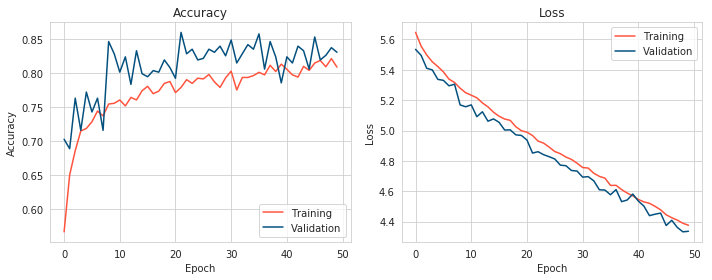

In [24]:
plot_metrics(d1a_history1)

In [18]:
validation_labels = np.array([0] * validation_samples[0] + 
                             [1] * validation_samples[1])

In [17]:
model_final.load_weights(location + '/top_model.h5')

Found 460 images belonging to 2 classes.

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       230
           1       0.79      0.92      0.85       230

   micro avg       0.84      0.84      0.84       460
   macro avg       0.85      0.84      0.84       460
weighted avg       0.85      0.84      0.84       460




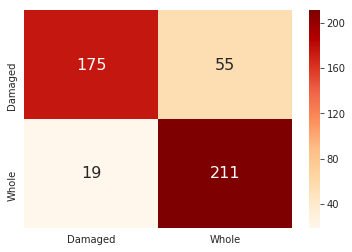

In [21]:
cm = evaluate_binary_model(model_final, validation_data_dir, validation_labels)

In [28]:
def car_damage(img_dir,model_pred):
    img = image.load_img(img_dir, target_size=(128, 128)) # this is a PIL image 
    x = image.img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
    x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
    pred = model_pred.predict(x)
    print ("Validating that damage exists...")
    print (pred)
    if pred[0][0] <=.5:

        print ("proceed to location and severity determination")
    else:
        print ("Are you sure that your car is damaged? Please submit another picture of the damage.")
        
        
        


In [29]:
car_damage("/home/18MCB1016/Documents/myyy rbl/05.jpg",model_final)

Validating that damage exists...
[[0.6262513]]
Are you sure that your car is damaged? Please submit another picture of the damage.
